# Transformations bijectives d'images
Auteurs : Philippe Mathieu et Jean-Paul Delahaye, [CRISTAL Lab](https://www.cristal.univ-lille.fr/), [SMAC Team](https://www.cristal.univ-lille.fr/?rubrique26&id=7), [University of Lille](http://www.univ-lille1.fr), email : {prenom.nom}@univ-lille.fr

Creation : 18/12/2021

## Qu'est-ce qu'une image ?

En informatique, une image est constituée de points (appelés pixels). Par exemple une image $100\times$100$ contient $10.000$ pixels. Un pixel est défini par ses coordonnées dans un repère cartésien, et on lui associe une couleur (codée en général sur 3 octets pour les composantes Rouge Vert Bleu). Chaque pixel peut bien sûr prendre n'importe quelle couleur.

L'ensemble des pixels forme un ensemble fini, donc énumérable. On peut donc parcourir tous les points de l'image et leur appliquer des transformations. C'est ce que font les logiciels d'embellissement d'images qui appliquent des filtres qui renforcent ou diminuent les couleurs. On peut aussi permuter deux points sur une image, ce qui revient en fait à permuter leurs couleurs respectives.

### Matplotlib et Numpy
La librairie Python [Matplotlib](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html) et sa bibliothèque `pyplot` est l'une des librairies permettant de faire du graphique en général et des manipulations basiques sur les images. [Numpy](https://numpy.org/doc/stable/user/absolute_beginners.html) quant à elle, fournit des fonctions puissantes de manipulations de tableaux multi-dimentionnels.

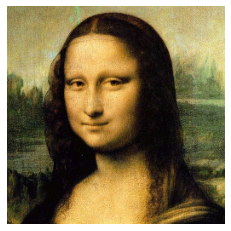

(256, 256, 4)

In [40]:
# Chargement d'une image
import matplotlib.pyplot as plt
import numpy as np
img = plt.imread('pics/joconde256.png')
# print(img.shape)

# visualisation de l'image
plt.axis('off')
plt.imshow(img) 
plt.show()
img.shape

La fonction `imread` de `pyplot` renvoie un tableau numpy à deux dimensions contenant dans chaque case un tableau de 3 valeurs (4 dans le cas du png) pour la couleur.
Manipuler une image revient donc à manipuler un tableau 2D numpy.

On peut bien sûr afficher la "valeur" d'un pixel. Les coordonnées d'un point sont indiquées dans lodre ligne,colonne avec une origine en haut à gauche. Par exemple `print(img[10,150])` affiche la 10è ligne, 105è colonne (le haut de la raie des cheveux de la joconde).
Le `jpg` encode ses pixels sur 3 valeurs pour RGB. `matplotlib` les représente en entiers de 0 à 255. Le `png` utilise quant à lui 4 valeurs : RGB + l'opacité. L'opacité étant un pourcentage (0% soit 0 pour transparent et 100% soit 1 pour opaque), `matplotlib` encode chacun de ces composants en type float allant de 0 à 1.

In [41]:
# Chargement d'une image
import matplotlib.pyplot as plt
img = plt.imread('pics/joconde256.png')

print(img[10,150])

[0.67058825 0.5921569  0.4117647  1.        ]


Pour le [codage des couleurs](https://htmlcolorcodes.com/fr/), noir=[0,0,0] ; bleu=[0,0,1] ; vert=[0,1,0] ; aqua=[0,1,1] ; rouge=[1,0,0] ;  fuscia=[1,0,1] ; jaune=[1,1,0] ; blanc=[1,1,1]

Si on souhaite mettre un point rouge sur le nez de notre joconde , il suffit donc d'écrire

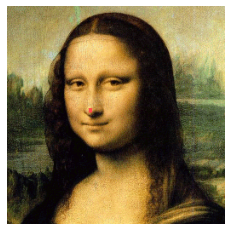

In [42]:
img[120:125,96:100]= [1,0,0]+[0.7]

# visualisation de l'image
plt.axis('off')
plt.imshow(img) 
plt.show()

Testez avec un point blanc, bleu, noir, vert, .....

Il est évidemment possible de créer la totalité de l'image par le même procédé. Il suffit pour cela de créer le bitmap de profondeur 4 avec une couleur donnée.
Voici par exemple comment créer une image 256x256 avec des couleurs aléatoires.

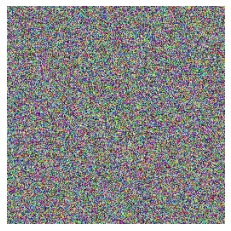

In [43]:
# couleur aléatoire : 
img = np.random.randint(0, 255, (256, 256, 3), dtype=np.uint8)
# couleur uniforme : aqua
#img = np.full((256,256,4), [0,1,1,1], dtype=np.float32)

# visualisation de l'image
plt.axis('off')
plt.imshow(img) 
plt.show()
plt.imsave('result/test.png',img)            



## Les transformations bijectives
La technique de transformation d'images que nous présentons ici consiste à déplacer les points de l'image (donc les couleurs, car les pixels proprement dits ne bougent pas) sans en perdre ni en ajouter aucun : c'est ce que l'on appelle communément un mélange. En mathématiques, un mélange dans un ensemble fini correspond à ce que l'on appelle une bijection (une application telle que tout élément de son ensemble d'arrivée ait un et un seul antécédent).

On cherche ici à étudier des fonctions qui définissent un tel mélange (donc des fonctions bijectives qui à un point de l'image fait correspondre un autre point).  D'où le titre que nous avons choisi : `Transformations bijectives d'Images`

Il est à noter qu'une transformation s'effectue en "simultané" : on donne l'illusion que tous les points bougent en même temps afin de ne pas en perdre. Pour effectuer cela, il est nécessaire de travailler sur une copie de l'image. On lit la position du point dans l'image initiale, on le repositionne dans l'image secondaire, jusqu'à ce que tous les points aient été traités. une fois fait, l'image secondaire devient l'image principale.

#### La transformation Miroir
La plus simple à comprendre parmi ces fonctions bijectives est la fonction miroir : Tous les points se déplacent vers leur symétrique relativement à l'axe vertical de l'image : les points à gauge vont à droite, les points à droite vont à gauche.

En Numpy, cela s'écrit très facilement : `return img[:, ::-1]`


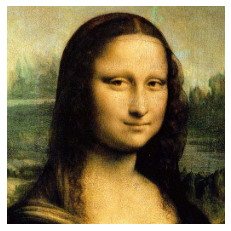

In [44]:
# Chargement d'une image
import matplotlib.pyplot as plt
img = plt.imread('pics/joconde256.png')

# transformation
img2 = img[:, ::-1]

# visualisation de l'image
plt.axis('off')
plt.imshow(img2) 
plt.show()

Parce que c'est une bijection, à force de l'appliquer, on retombe sur la même image au bout d'un certain temps. C'est une propriété de TOUTES les bijections dans un ensemble fini. Evidemment, ici, 2 applications successives de la fonction Miroir re-fournissent l'image initiale.

#### La transformation DecalageGauche

Dans la transformation `miroir` précédente, le temps de retour à l'image initiale est de 1 étape.
D'autres transformations prennent bien sûr plus de temps. Le décalage gauche par exemple, qui consiste à déplacer tous les pixels d'un cran vers la gauche, nécessitera pour revenir à son point de départ autant d'étapes que la largeur de l'image.

Cette transformation se code en Numpy via :
`[[img[row][(col + 1) % width] for col in range(width)] for row in range(height)]`

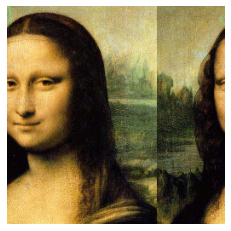

In [45]:
import numpy as np

# transformation
height, width, _ = img.shape

# 100 étapes
img2=img.copy()
for _ in range(80) :
    img2 = np.array([[img2[row][(col + 1) % width] for col in range(width)] for row in range(height)])

# visualisation de l'image
plt.axis('off')
plt.imshow(img2) 
plt.show()

#### La transformation du Photomaton

La plus spectaculaire des transformations bijectives est sans aucun doute la transformation du Photomaton. On prend chaque bloc de 4 pixels, et on fait en sorte que chacun de ces 4 pixels se répartissent dans les 4 grandes parties de l'image.
(dessin avec le bloc de 4 en haut-gauche, et son éparpillement)

Dès la premiere étape, on a l'impression d'avoir recopié 4 fois l'image en plus petit. Mais il n'en n'est rien ! C'est bien de 4 images différentes
qu'il s'agit. Elles se ressemblent mais elles sont différentes !


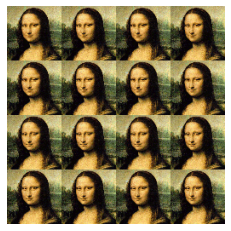

In [46]:
# fonction qui concatène les points "pairs" avec les points "impairs"
def EvenOddIndex(img: np.ndarray) -> np.ndarray:
    return np.concatenate((img[::2], img[1::2]))

# 2 étapes
img2=img.copy()
for _ in range(2) :
    img2 = np.array(EvenOddIndex([EvenOddIndex([img2[row, col] for col in range(width)]) for row in range(height)]))

# visualisation de l'image
plt.axis('off')
plt.imshow(img2) 
plt.show()

## Les trajectoires de pixels
On comprend aisément, que, pour une bijection donnée, les points se "balladent" sur l'image avant de revenir à leur point de départ. Leur parcours constitue un cycle, et ce cycle possède donc une taille.

En ayant calculé un cycle à partir d'un point, on a aussi par définition le cycle de chacun des points qui le constitue. Tous ces points reviennent à la même position au même moment.

Le nombre de points de l'image étant fini, il est possible de calculer tous les cycles possibles (il y en a beaucoup moins que de points sur l'image) ainsi que toutes les tailles de ces cycles.

En général, le nombre de cycles dépend non seulement de la bijection choisie, mais aussi de la taille de l'image. Une taille paire, ne donne en général pas la même chose qu'une taille impaire, idem si nombres premiers ou puissances de 2.

par exemple :
- Joconde 256x256 avec photomaton -> 8 étapes
- Joconde 252x212 avec photomaton -> 1050 étapes

### Retour à la case départ

Le problème consiste donc à calculer le nombre d'étapes nécéssaires au retour initial. Il suffirait bien sûr de laisser tourner l'ordinateur jusqu'au retour à l'image initiale en comptant les étapes, mais le temps de calcul risque parfois d'être très long ! (Pour certains cas même très simples (voir Boulanger avec des tailles impaires) il faut des milliards d'étapes.)

Or il est facile de comprendre que l'image initiale correspond finalement à la situation où tous les cycles sont synchronisés. Ce nombre est donc le PPCM des tailles de tous les cycles.
- Si on a 3 cycles de taille 3,9,24 -> il faudra 72 étapes
- Si on a 3 cycles de taille 3,5,7 -> il faudra 105 étapes.

On peut donc calculer le nombre d'étapes nécessaires au retour à l'image initiale, sans même réaliser ces étapes.


La mise en place de cette technique nécessite quatre étapes
1. Mettre en place la fonction qui donne l'image d'un pixel;
2. Calculer la trajectoire d'un pixel;
3. Calculer l'ensemble de tous les cycles;
4. Calculer le ppcm des longueurs de tous les cycles



#### Mettre en place la fonction qui donne l'image d'un pixel

Précédemment, nous calculions directement la transformée d'une image. Pour faciliter le calcul des cycles, il est préférable de coder des fonctions "successeur" d'un point passé en paramètre afin de pouvoir "suivre" chaque point facilement. Bien évidemment ces calculs sont vrais pour toutes les images de même taille. Nul besoin d'une image particulière pour les exécuter; un bitmap de la bonne taille suffit.


In [47]:

def mirrorVerticalPoint(coord: tuple, height: int, width: int) -> tuple:
    return width - 1 - coord[0], coord[1]


def rotateVerticalPoint(coord: tuple, height: int, width: int) -> tuple:
    return (coord[0] + 1) % height, coord[1]


# Contrainte de taille d'image :  hauteur et largeur paires
def photomatonPoint(coord: tuple, height: int, width: int) -> tuple:
    x, y = coord
    x2, y2 = x // 2, y // 2
    return x2 if (x % 2 == 0) else x2 + (height // 2), \
           y2 if (y % 2 == 0) else y2 + (width // 2) 
   

In [48]:
rotateVerticalPoint((10,10),254,254)

(11, 10)

#### Calculer la trajectoire d'un pixel

A partir d'une coordonnée passée en paramètre, on applique la transformée définie précédemment jusqu'à retourner à la coordonnée de départ. L'ensemble des coordonnées par lesquelles on passe constitue l'ensemble des pixels qu'il faudra successivement appliquer à un pixel de l'image; On utilise pour cela un tableau de booléens `bitmap` de la même taille que l'image. Quand une coordonnée est atteinte on l'indique par True dans ce tableau.

In [49]:
def getOnePath(coord: tuple, bitmap: np.ndarray, function) -> list:
    height, width = bitmap.shape
    row, col = coord
    result = []
    while not bitmap[row, col]:
        bitmap[row, col] = True
        result += [(row, col)]
        row, col = function((row, col), height, width)       
    return result


In [50]:
bitmap = np.full((256,256), False, dtype=bool)
print( getOnePath((10,10),bitmap, photomatonPoint) )

[(10, 10), (5, 5), (130, 130), (65, 65), (160, 160), (80, 80), (40, 40), (20, 20)]


#### Calculer l'ensemble de tous les cycles

Tant qu'une coordonnée du bitmap n'est pas à True, on recommence le calcul d'un nouveau cycle à partir de cette coordonnée.

In [51]:
def getAllPath(bitmap: np.ndarray, function) -> list:
    result = []
    row, col = 0, 0
    height, width = bitmap.shape
    for row in range(height) :
        for col in range(width) :
            if not bitmap[row, col]:
                result += [getOnePath((row, col), bitmap, function)]
    return result

In [52]:
# Exemple

bitmap = np.full((256,256), False, dtype=bool)
allCycles = getAllPath(bitmap, photomatonPoint)

print("nb of cycles : ",len(allCycles))
print("max length   : ", max({len(i) for i in allCycles}) )
print("min length   : ", min({len(i) for i in allCycles}) )

# On range les len dans un set pour éviter les doublons, ce qui simplifie les calculs de ppcm

nb of cycles :  8230
max length   :  8
min length   :  1


In [53]:
# Un peu d'analyse
keys,values = np.unique([len(i) for i in allCycles] ,return_counts=True)
print("longueurs : ",keys, "\t frequences : ",values)

# Récuperer les cycles de longueur 1 et 2
nearAll = list(filter(lambda x : len(x)<3  , allCycles) )
nearAll

longueurs :  [1 2 4 8] 	 frequences :  [   4    6   60 8160]


[[(0, 0)],
 [(0, 85), (0, 170)],
 [(0, 255)],
 [(85, 0), (170, 0)],
 [(85, 85), (170, 170)],
 [(85, 170), (170, 85)],
 [(85, 255), (170, 255)],
 [(255, 0)],
 [(255, 85), (255, 170)],
 [(255, 255)]]

#### Calculer le ppcm des longueurs de tous les cycles

Le ppcm de tous les cycles indique le plus petit nombre d'étapes nécessaire pour que tous les cycles soient en phase, ou en d'autres termes que tous les points soient revenus à leur position initiale. 

In [54]:
import math

# lcm is in math since python v9
def lcm(a,b): return (a*b)//math.gcd(a,b)

def processLCM(allCycles: list) -> int:
    result = 1
    for i in {len(i) for i in allCycles}:
        result = lcm(result, i)
    return result

In [55]:
# Exemple

bitmap = np.full((256,256), False, dtype=bool)
print("different lengths : ", {len(i) for i in allCycles})
processLCM(getAllPath(bitmap,photomatonPoint))

different lengths :  {8, 1, 2, 4}


8

#### Dessin de la trajectoire d'un pixel

Il est bien évidemment possible de visualiser sur une image les différentes étapes qu'un pixel va suivre. 

Attention : l'adressage d'une image se fait en (lig,col) avec une origine en haut à gauche, alors que la fonction plot prend des (col,lig). Il faut donc inverser les coordonnées dans la fonction `plot`. Par ailleurs la fonction `plot`prend en premier argument la liste des x, puis la liste des y.

In [56]:
def drawLine(coord1: tuple, coord2: tuple, color="Red", linewidth=1, marker=""):
    lx, ly = [coord1[0], coord2[0]], [coord1[1], coord2[1]]
    plt.plot(ly,lx, color=color, linewidth=linewidth, marker=marker)


def drawCycle(cycle: list, color="Red", linewidth=1, marker=""):
    for i in range(len(cycle)):
        drawLine(cycle[i-1], cycle[i], color, linewidth, marker)

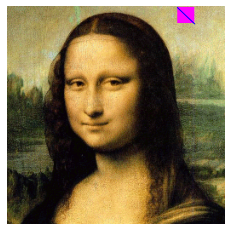

In [57]:
# test drawLine, avec inversion des coordonnées ... juste pour vérifier
img = plt.imread('pics/joconde256.png')

img[1:20, 200:220] = [1,0,1,1]
drawLine((1,200),(20,220),color="blue")

plt.axis('off')
plt.imshow(img)
plt.show()

[(1, 139), (128, 197), (64, 226), (32, 113), (16, 184), (8, 92), (4, 46), (2, 23)]


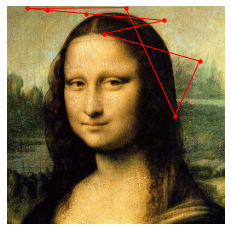

In [58]:
# Exemple

oneCycle = allCycles[175]
print(oneCycle)
img = plt.imread('pics/joconde256.png')
drawCycle(oneCycle,marker=".")

plt.axis('off')
plt.imshow(img)
plt.show()

### Un GOTO n'importe quelle étape

Une fois ces cycles calculés, il devient facile d'aller à n'importe quelle étape `n`. Il suffit de calculer pour chaque point le décalage dans le cycle de `n` modulo la taille du cycle. Si le cycle est `(p1,p2,p3)`un "goto 1000 étapes" positionnera `p2` à la place de `p1`, `p3` à la place de `p2` et `p1` à la place de `p3`. En quelque sorte, on fait juste "tourner les cycles", comme si c'était des roues dentées.

In [59]:
def goto(img: np.ndarray, step: int, listCycles: list) -> np.ndarray:
    resultImg = np.empty_like(img)
    for cycle in listCycles:
        modulo = step % len(cycle)
        for indexInit in range(len(cycle)):
            indexFinal = (indexInit + modulo) % len(cycle)
            resultImg[cycle[indexFinal]]=img[cycle[indexInit]]
    return resultImg

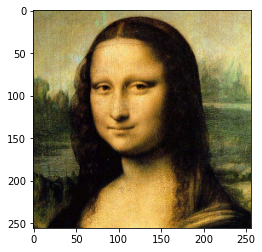

In [60]:
# Exemple : goto 1000
# Sur une image (252x252), photomaton a retour au bout de 8 étapes. (1000%8)=0 , donc goto 1000 revient au départ.

bitmap = np.full((256,256), False, dtype=bool)
allp = getAllPath(bitmap,photomatonPoint)

img = plt.imread('pics/joconde256.png')
img2 = goto(img,1000,allp)
plt.imshow(img2)

### Image approchée

On comprend maintenant facilement que si on effectue un nombre d'étapes correspondant à un PPCM d'un sous-ensemble de cycles, on arrive à une image très approchée de l'image initiale dans laquelle très peu de points ne seront pas encore en place (uniquement ceux des cycles manquants).


Cycles :  {1, 3, 132, 4, 2310, 10, 11, 4620, 12, 660, 21, 20, 924, 30, 33, 420, 44, 60, 330, 210, 84, 220, 231, 110} 	PPCM :  4620


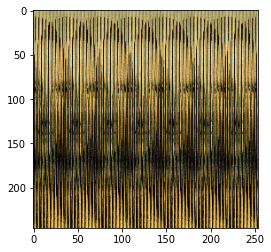

In [61]:
# Sur une image (246x254), photomaton a un retour au bout de 4620 étapes.
# Dans ce cas il y a 24 longueurs de cycles différentes

bitmap = np.full((246,254), False, dtype=bool)
allp = getAllPath(bitmap,photomatonPoint)
print("Cycles : ",{len(i) for i in allp} , "\tPPCM : ",processLCM(allp))

img = plt.imread('pics/joconde256.png')
img_small = img[0:246,0:254]

img2 = goto(img_small,420,allp)
plt.imshow(img2)

## Les fractales
Parmi les bijections potentielles, certaines ne s'appuient que sur 1 seul cycle. C'est notamment le cas des courbes fractales qui remplissent un espace 2D en passant une fois et une seule par toutes les cases. Il n'y a ici plus qu'un seul cycle. 

Il existe de nombreuses courbes fractales qui remplissent l'espace
- [Hilbert](http://fr.wikipedia.org/wiki/Courbe_de_Hilbert)
- [Peano](https://fr.wikipedia.org/wiki/Courbe_de_Peano)
- [Lebesgue](https://fr.wikipedia.org/wiki/Courbe_de_Lebesgue)
- [Moore](https://mathcurve.com/fractals/moore/moore.shtml)

De telles fonctions se codent facilement avec des procédures récursives (voir par exemple [la page wikipedia](http://fr.wikipedia.org/wiki/Courbe_de_Hilbert)  correspondante).

On comprend aisément que, comme il s'agit d'une fonction récursive, contrairement aux fonctions précédentes, il n'est pas possible de calculer le successeur d'un point sans calculer la totalité du chemin.
On écrit donc pour ces courbes une fonction spécifique : `getFractalPath` qui appelle une fonction fractale récursive un nombre d'étapes suffisant pour emplir l'espace.


In [62]:
def getFractalPath(bitmap: np.ndarray, function) -> list:
    height, width= bitmap.shape
    power = int(math.log(height, 2))
    cycle = function(height, width, power)
    return [cycle]

def hilbertFractal(height, width, step):
    return hilbert(0, 0, height, 0, 0, width, step)

def hilbert(x0, y0, xi, xj, yi, yj, n):
    if n <= 0:
        return [(x0 + (xi + yi) // 2, y0 + (xj + yj) // 2)]
    else:
        return hilbert(x0, y0, yi // 2, yj // 2, xi // 2, xj // 2, n - 1) + \
               hilbert(x0 + xi // 2, y0 + xj // 2, xi // 2, xj // 2, yi // 2, yj // 2, n - 1) + \
               hilbert(x0 + xi // 2 + yi // 2, y0 + xj // 2 + yj // 2, xi // 2, xj // 2, yi // 2, yj // 2, n - 1) + \
               hilbert(x0 + xi // 2 + yi, y0 + xj // 2 + yj, -yi // 2, -yj // 2, -xi // 2, -xj // 2, n - 1)

On peut bien sûr visualiser la courbe correspondant à l'unique cycle obtenu. Pour cette visualisation on trace une courbe classique, chaque case correspond bien évidemment à un point, nous plaçons la courbe au milieu de chaque case.

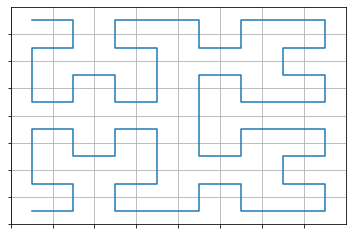

In [63]:
import math

def drawFractalPath(cycle: list):
    plt.figure()
    axis = plt.subplot(1, 1, 1)

    # pour supprimer les axes et les ticks
    plt.xlim(0, size)
    plt.ylim(0, size)
    major_ticks = np.arange(0, size, 1)
    axis.set_xticks(major_ticks)
    axis.set_yticks(major_ticks)
    axis.axes.xaxis.set_ticklabels([])
    axis.axes.yaxis.set_ticklabels([])

    plt.grid()
    xs = [ t[0] + 0.5 for t in cycle]
    ys = [ t[1] + 0.5 for t in cycle]
    plt.plot(xs, ys)
    plt.show()


# la taille doit être une puissance de 2
size = pow(2,3)
bitmap = np.full((size, size), 150, dtype=np.uint8)
cycle = getFractalPath(bitmap, hilbertFractal)[0]
drawFractalPath(cycle)

Il ne reste plus qu'à appeler cette fonction pour calculer l'unique cycle correspondant et l'appliquer comme précédemment à une image.

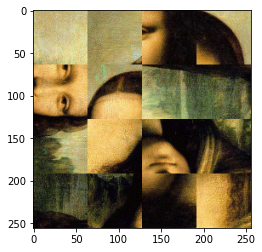

In [64]:
# size of bitmap must be a power of 2
bitmap = np.full((256,256), False, dtype=bool)
cycle = getFractalPath(bitmap,hilbertFractal)
img = plt.imread('pics/joconde256.png')

img2 = goto(img,4096,cycle)
plt.imshow(img2)

Chaque pixel glisse d'un pixel le long de la courbe et, au cours des transformations,chaque pixel suit donc le trajet de la courbe. Le temps de retour est le nombre de pixels de l'image.

Ce qui est remarquable avec cette courbe (et d'une manière générale avec les fractales) c'est que si vous l'appliquez N fois en prenant pour N une puissance de 2 (ou un multiple d’une puissance de 2), vous obtenez une image composée de carrés bien nets, ceux de l'image initiale tournés, mélangés et retournés (c'est-à- dire résultant d'une symétrie par rapport à une droite). Plus la puissance de 2 est élevée, plus ces carrés sont de grande taille.

L'explication provient de ce que les points suivent la courbe de Hilbert qui est composée de quatre fois la même forme. Donc lorsqu'un quart du parcours a été fait, tous les pixels se redisposent exactement comme au départ dans les quarts du carré initial, chacun en ayant changé de carré.

On peut donc s'amuser à faire les déplacements correspondants aux puissances de 2. Plus la puissance de 2 est élevée, plus les carrés seront de grande taille. On pourra essayer notamment 2048 (2^11) qui donne 8x8 carrés , 4096 (2^12) qui donne 4x4 carrés , 8192 (2^13) qui donne 2x2 carrés avec une image initiale de 256x256.


### Lebesgue

On peut construire la courbe de Lebesgue exactement de la même manière

In [65]:
def lebesgueFractal(height, width, step):
    return lebesgue(0, 0, step)


def lebesgue(x, y, n):
    if n <= 1:
        return [(x, y), (x + 1, y), (x, y + 1), (x + 1, y + 1)]
    else:
        jump = int(math.pow(2, n-1))
        return lebesgue(x, y, n - 1) + \
               lebesgue(x + jump, y, n - 1) + \
               lebesgue(x, y + jump, n - 1) + \
               lebesgue(x + jump, y + jump, n - 1)

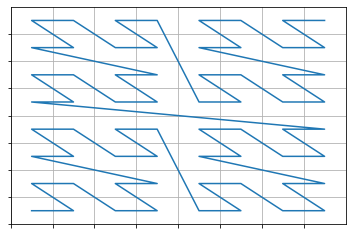

In [66]:
# la taille doit être une puissance de 2
size = pow(2,3)
bitmap = np.full((size, size), 150, dtype=np.uint8)
cycle = getFractalPath(bitmap, lebesgueFractal)[0]
drawFractalPath(cycle)

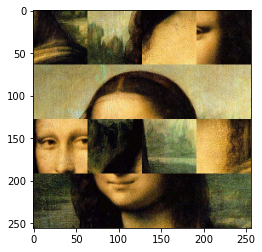

In [67]:
# size of bitmap must be a power of 2
bitmap = np.full((256,256), False, dtype=bool)
cycle = getFractalPath(bitmap,lebesgueFractal)
img = plt.imread('pics/joconde256.png')

img2 = goto(img,4096,cycle)
plt.imshow(img2)

## Bibliographie

- JP Delahaye et P Mathieu. Images brouillées, Images retrouvées. Pour la Science n°242, pp102-106, 1997
- JP Delahaye, P Mathieu. Une Scytale Informatique. Pour la Science, n°359, pp90-95,Septembre 2007 [download](https://www.cristal.univ-lille.fr/~jdelahay/pls/2007/161.pdf)
- https://accromath.uqam.ca/2012/01/rubrique-des-paradoxes-solution-de-mona-lisa-au-photomaton/

et pour les fractales
- JP Delahaye. Labyrinthes de longueur infinie. Pour la Science n°319, pp90-95, 2004  [download](https://www.cristal.univ-lille.fr/~jdelahay/pls/2004/116.pdf)
- http://www.fundza.com/algorithmic/space_filling/hilbert/basics/
